In [1]:
import numpy as np
from DecisionTree import DecisionTreeClassifier
import pandas as pd

In [2]:
df = pd.read_csv('../Datasets/Iris.csv')

In [3]:
df.drop('Id', axis=1, inplace=True)

In [4]:
df.loc[df['Species']=='Iris-setosa', 'Species'] = 0
df.loc[df['Species']=='Iris-versicolor', 'Species'] = 1
df.loc[df['Species']=='Iris-virginica', 'Species'] = 2

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
class RandomForestClassifier:

    def __init__(self, min_samples_split=2, max_depth=2, n_trees=50):
        self.min_samples_split= min_samples_split
        self.max_depth=max_depth
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        for tree in range(self.n_trees):
            d = DecisionTreeClassifier(self.min_samples_split, self.max_depth, random_forest=True)
            d.fit(X, y)
            self.trees.append(d)

    def predict(self, x):
        predictions = [t.predict(x)[0] for t in self.trees]
        # Predict outcome by majority vote of the trees ensemble
        return max(set(predictions), key=lambda x: predictions.count(x))


In [7]:
r = RandomForestClassifier()
r.fit(X,y.reshape(-1,1))

In [8]:
r.predict(np.array([4.8, 3. , 1.4, 0.1]).reshape(1,-1))

0

In [9]:
cov = np.array([
    [1,0],
    [0,1]
])

# Gaussian distribution n1
sample_1 = np.random.multivariate_normal(mean=np.array([1,2]), cov=cov, size=300)
y_1 = np.zeros(shape=len(sample_1[:, 0]))

In [10]:
sample_2 = np.random.multivariate_normal(mean=np.array([4,3]), cov=cov, size=300)
y_2 = np.ones(shape=len(sample_2[:,0]))


In [11]:
X = np.vstack((sample_1, sample_2))
y = np.hstack((y_1, y_2)).reshape(-1, 1)

In [12]:
X_y=np.concatenate((X,y), axis=1)

In [13]:
np.random.shuffle(X_y)

In [14]:
d = RandomForestClassifier(min_samples_split=2, max_depth=2)
d.fit(X_y[:, :-1], X_y[:, -1].reshape(-1,1))

In [17]:
#On top of it plot the decision boundary created by the algorithm
sample_v = np.random.multivariate_normal(mean=np.array([3,3]), cov=cov, size=1500)
class_v = np.zeros(len(sample_v[:,0]))
for i in range(len(sample_v[:, 0])):
    class_v[i] = d.predict(sample_v[i, :].reshape(1,-1))

In [18]:
d.predict(sample_v[i, :].reshape(1,-1))

1.0

In [19]:
sample_v[i, :].reshape(1,-1)

array([[3.84277089, 2.06053643]])

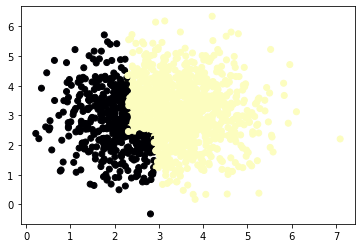

In [20]:
import matplotlib.pylab as plt
plt.scatter(x= sample_v[:, 0], y= sample_v[:, 1], c=class_v, cmap='magma')
